In [1]:
import pandas as pd

In [2]:
qvals = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/lead_caQTL_variants.tsv.gz", sep="\t", header=0)


In [3]:
qvals["chr"] = "chr"+qvals["Chr"].astype(str) 

In [4]:
qvals

,Peak,Chr,Pos,RsID,Ref,Alt,AF,Inside_Peak,P_Lead,Beta,SE,Log10_BF,chr
0,1,1,10352,rs555500075,T,TA,0.38240,1,0.565592,0.091926,0.055039,-1.165323,chr1
1,2,1,10177,rs367896724,A,AC,0.32395,2,0.021318,-0.141834,0.062422,-0.618151,chr1
2,3,1,875770,rs4970379,A,G,0.62500,2,0.044994,0.155446,0.057836,-0.232537,chr1
3,4,1,1142714,esv3584990,T,<CN0>,0.13485,0,0.202811,-0.089320,0.072935,-1.315789,chr1
4,5,1,930533,rs3128110,C,G,0.35435,0,0.099392,0.174020,0.040562,1.751829,chr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297303,277126,22,50451910,esv3648079;esv3648080;esv3648081,"C,<CN3>","<CN2>,<CN4>",0.08385,0,0.052782,-0.006902,0.093478,-1.528304,chr22
297304,277126,22,50451910,esv3648079;esv3648080;esv3648081,"C,<CN4>","<CN2>,<CN3>",0.08385,0,0.052782,-0.006902,0.093478,-1.528304,chr22
297305,277126,22,50451910,esv3648079;esv3648080;esv3648081,C,"<CN2>,<CN3>,<CN4>",0.08385,0,0.052782,-0.006902,0.093478,-1.528304,chr22
297306,277127,22,51194960,rs376693911,AAGTTTTGTCTCAGAGGAGTACCCGGCC,A,0.18075,1,0.344576,0.159435,0.048414,0.406650,chr22


<AxesSubplot:>

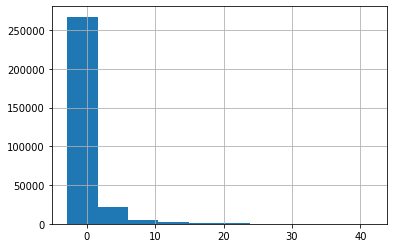

In [5]:
qvals["Log10_BF"].hist()

In [6]:
qvals = qvals.sort_values('Log10_BF').drop_duplicates(["chr", "Ref", "Alt", "Pos"], keep='last')

In [7]:
data_dnase = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/DNASE/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
data_dnase[['Chrx', 'Posx', 'REF', 'ALT']] = data_dnase['rsid'].str.split("_", expand=True)

data_atac = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/ATAC/summary.mean.variant_scores_new.tsv", sep="\t", header=0)
data_atac[['Chrx', 'Posx', 'REF', 'ALT']] = data_atac['rsid'].str.split("_", expand=True)


In [8]:
merged_atac = data_atac.merge(qvals, how="left", left_on=["chr", "allele1", "allele2", "pos"], right_on=["chr", "Ref", "Alt", "Pos"]).drop_duplicates()
merged_dnase = data_dnase.merge(qvals, how="left", left_on=["chr", "allele1", "allele2", "pos"], right_on=["chr", "Ref", "Alt", "Pos"]).drop_duplicates()


In [9]:
data_atac.shape

(226346, 27)

In [10]:
data_atac.drop_duplicates().shape

(177813, 27)

In [12]:
merged_atac.head()

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,Pos,RsID,Ref,Alt,AF,Inside_Peak,P_Lead,Beta,SE,Log10_BF
0,chr1,875770,A,G,chr1_875770_A_G,-0.007064,0.019171,0.638875,0.010017,0.345494,...,875770,rs4970379,A,G,0.62500,2,0.044994,0.155446,0.057836,-0.232537
1,chr1,930533,C,G,chr1_930533_C_G,0.067004,0.067004,0.221500,0.013255,0.217156,...,930533,rs3128110,C,G,0.35435,0,0.099392,0.174020,0.040562,1.751829
2,chr1,565286,C,T,chr1_565286_C_T,0.025990,0.033121,0.444937,0.009459,0.394183,...,565286,rs1578391,C,T,0.59780,1,0.998561,0.886884,0.188153,3.085214
3,chr1,569204,T,C,chr1_569204_T_C,-0.040934,0.051658,0.293225,0.018886,0.119670,...,569204,rs112660509,T,C,0.40125,1,0.477613,0.251458,0.140264,-0.671608
4,chr1,748141,G,A,chr1_748141_G_A,-0.034312,0.068099,0.223811,0.008248,0.466251,...,748141,rs2427893,G,A,0.05005,0,0.988758,0.347965,0.059578,4.597219


In [29]:
merged_atac["pos1"] = merged_atac["pos"] + 2
merged_atac_new = merged_atac[merged_atac.columns[0:2].tolist()+["pos1"]+merged_atac.columns[2:39].tolist()]
pathe="/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/peak_list/"
merged_atac_new[merged_atac_new["Log10_BF"]<2].to_csv(pathe+"nonsig.bed",sep="\t", header=False, index=False)

In [30]:
merged_atac_new[merged_atac_new["Log10_BF"]>2].to_csv(pathe+"sig.bed",sep="\t", header=False, index=False)

In [70]:
sum(merged_atac["Log10_BF"]>20)

890

,chr,pos,pos1,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,...,Pos,RsID,Ref,Alt,AF,Inside_Peak,P_Lead,Beta,SE,Log10_BF
0,chr1,875770,875772,A,G,chr1_875770_A_G,-0.007064,0.019171,0.638875,0.010017,...,875770,rs4970379,A,G,0.62500,2,0.044994,0.155446,0.057836,-0.232537
1,chr1,930533,930535,C,G,chr1_930533_C_G,0.067004,0.067004,0.221500,0.013255,...,930533,rs3128110,C,G,0.35435,0,0.099392,0.174020,0.040562,1.751829
2,chr1,565286,565288,C,T,chr1_565286_C_T,0.025990,0.033121,0.444937,0.009459,...,565286,rs1578391,C,T,0.59780,1,0.998561,0.886884,0.188153,3.085214
3,chr1,569204,569206,T,C,chr1_569204_T_C,-0.040934,0.051658,0.293225,0.018886,...,569204,rs112660509,T,C,0.40125,1,0.477613,0.251458,0.140264,-0.671608
4,chr1,748141,748143,G,A,chr1_748141_G_A,-0.034312,0.068099,0.223811,0.008248,...,748141,rs2427893,G,A,0.05005,0,0.988758,0.347965,0.059578,4.597219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226341,chr22,51021271,51021273,T,C,chr22_51021271_T_C,-0.018318,0.041597,0.376340,0.012623,...,51021271,rs540889063,T,C,0.05500,1,0.362698,0.010717,0.018974,-2.153040
226342,chr22,51059483,51059485,G,A,chr22_51059483_G_A,-0.044313,0.054137,0.313944,0.012971,...,51059483,rs76733141,G,A,0.06000,1,0.553273,-0.061982,0.032636,-1.221145
226343,chr22,51066552,51066554,C,G,chr22_51066552_C_G,-0.085015,0.086177,0.171138,0.019822,...,51066552,rs6151406,C,G,0.06000,1,0.921861,0.087364,0.030622,-0.324830
226344,chr22,51082407,51082409,T,A,chr22_51082407_T_A,-0.030337,0.030337,0.479451,0.004881,...,51082407,rs62241515,T,A,0.42505,1,0.315251,-0.016347,0.055462,-1.737317


In [34]:
full_non_sig = pd.read_csv("/mnt/lab_data2/anusri/variant-scorer/src/output/caqtls_lcl_latest/peak_list/nonsig_peak_annot.bed", sep="\t", header=None)

In [38]:
full_non_sig_no_peak = full_non_sig[full_non_sig[51]==0]

In [41]:
import numpy as np

In [103]:
nonsig_peaks_all = full_non_sig_no_peak[np.arange(41)]

In [104]:
nonsig_peaks = full_non_sig[(full_non_sig[51]>0) & (full_non_sig[50]=="0")].drop_duplicates(np.arange(40))[np.arange(41)]

In [105]:
nonsig_peaks_all_sub = nonsig_peaks_all.sample(36500).reset_index(drop=True)

In [106]:
nonsig_peaks.shape

(8110, 41)

In [114]:
nonsig_all = pd.concat([nonsig_peaks_all_sub, nonsig_peaks])[np.arange(41)[0:2].tolist()+np.arange(41)[3:].tolist()]

In [115]:
len(merged_atac.columns)

40

In [116]:
nonsig_all["label"] = 0

In [118]:
nonsig_all

,0,1,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,label
0,chr1,160677613,C,T,chr1_160677613_C_T,-0.006140,0.033261,0.434114,0.008840,0.418240,...,C,T,0.1450,1,0.599084,0.014915,0.017421,-2.101169,.,0
1,chr1,230508244,T,C,chr1_230508244_T_C,0.022412,0.034922,0.435949,0.007122,0.572663,...,T,C,0.7000,1,0.368925,0.117345,0.056146,-0.827758,.,0
2,chr4,168994011,C,A,chr4_168994011_C_A,-0.000400,0.016360,0.665052,0.004222,0.889222,...,C,A,0.2950,1,0.574949,0.060176,0.037263,-1.372773,.,0
3,chr9,1615372,G,A,chr9_1615372_G_A,0.095218,0.095218,0.175024,0.012624,0.294793,...,G,A,0.0800,0,0.011157,-0.290187,0.080269,1.053361,.,0
4,chr11,34127122,C,G,chr11_34127122_C_G,-0.042363,0.099692,0.127116,0.013583,0.205307,...,C,G,0.0800,1,0.917202,0.049130,0.017981,-0.690789,.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168069,chr22,44455473,A,G,chr22_44455473_A_G,-0.068482,0.068482,0.211127,0.029070,0.047526,...,A,G,0.5500,1,0.943300,-0.137981,0.046070,0.017363,chr22,0
168109,chr22,45684098,T,C,chr22_45684098_T_C,0.332763,0.332763,0.015969,0.017665,0.132350,...,T,C,0.7749,1,0.901112,0.127909,0.044940,-0.166127,chr22,0
168189,chr22,50541416,A,G,chr22_50541416_A_G,0.011979,0.063533,0.257233,0.007904,0.491813,...,A,G,0.1296,1,0.302305,0.030018,0.061512,-1.659754,chr22,0
168209,chr22,50700083,C,T,chr22_50700083_C_T,0.009713,0.017407,0.649649,0.008549,0.432890,...,C,T,0.3350,1,0.224398,0.019085,0.020382,-2.002190,chr22,0


In [119]:
sigall = merged_atac[merged_atac["Log10_BF"]>20]

In [120]:
sigall["label"] = 1

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
sigall

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,Ref,Alt,AF,Inside_Peak,P_Lead,Beta,SE,Log10_BF,pos1,label
88,chr1,1620860,G,A,chr1_1620860_G_A,-0.138112,0.138112,0.083123,0.017476,0.146502,...,G,A,0.450,0,0.264973,0.612583,0.043073,21.847344,1620862,1
89,chr1,1620885,T,C,chr1_1620885_T_C,0.017374,0.072250,0.203682,0.022865,0.080495,...,T,C,0.450,0,0.264973,0.612583,0.043073,21.847344,1620887,1
224,chr1,4327635,C,T,chr1_4327635_C_T,-0.913667,0.913667,0.000829,0.044784,0.017817,...,C,T,0.550,1,0.999782,-0.666789,0.041505,25.445000,4327637,1
810,chr1,16821365,C,T,chr1_16821365_C_T,-0.079640,0.079640,0.194069,0.013253,0.217739,...,C,T,0.625,0,0.398977,-1.042415,0.070059,23.359123,16821367,1
1028,chr1,22345647,C,T,chr1_22345647_C_T,-0.327098,0.327098,0.018307,0.028709,0.050619,...,C,T,0.670,1,1.000000,-0.767072,0.038644,32.266929,22345649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226225,chr22,48314463,G,A,chr22_48314463_G_A,0.706527,0.706527,0.002365,0.030788,0.042415,...,G,A,0.410,1,1.000000,1.627204,0.098564,26.641349,48314465,1
226241,chr22,50050468,G,A,chr22_50050468_G_A,0.016586,0.016586,0.677033,0.005834,0.698898,...,G,A,0.670,0,0.138840,-1.033692,0.078351,20.007726,50050470,1
226242,chr22,50052921,G,A,chr22_50052921_G_A,-0.016846,0.016846,0.644669,0.008453,0.447029,...,G,A,0.670,0,0.138840,-1.033692,0.078351,20.007726,50052923,1
226243,chr22,50053871,G,A,chr22_50053871_G_A,-0.049552,0.049552,0.310879,0.007635,0.515667,...,G,A,0.670,0,0.138840,-1.033692,0.078351,20.007726,50053873,1


In [122]:
nonsig_all.columns = sigall.columns
alldf = pd.concat([nonsig_all,sigall])

In [123]:
alldf.columns

Index(['chr', 'pos', 'allele1', 'allele2', 'rsid', 'logfc.mean',
       'abs_logfc.mean', 'abs_logfc.mean.pval', 'jsd.mean', 'jsd.mean.pval',
       'logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean', 'abs_logfc_x_jsd.mean.pval',
       'max_percentile.mean', 'max_percentile.mean.pval',
       'logfc_x_max_percentile.mean', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'jsd_x_max_percentile.mean',
       'jsd_x_max_percentile.mean.pval',
       'abs_logfc_x_jsd_x_max_percentile.mean',
       'abs_logfc_x_jsd_x_max_percentile.mean.pval',
       'logfc_x_jsd_x_max_percentile.mean', 'Chrx', 'Posx', 'REF', 'ALT',
       'Peak', 'Chr', 'Pos', 'RsID', 'Ref', 'Alt', 'AF', 'Inside_Peak',
       'P_Lead', 'Beta', 'SE', 'Log10_BF', 'pos1', 'label'],
      dtype='object')

In [124]:
alldf

,chr,pos,allele1,allele2,rsid,logfc.mean,abs_logfc.mean,abs_logfc.mean.pval,jsd.mean,jsd.mean.pval,...,Ref,Alt,AF,Inside_Peak,P_Lead,Beta,SE,Log10_BF,pos1,label
0,chr1,160677613,C,T,chr1_160677613_C_T,-0.006140,0.033261,0.434114,0.008840,0.418240,...,C,T,0.145,1,0.599084,0.014915,0.017421,-2.101169,.,0
1,chr1,230508244,T,C,chr1_230508244_T_C,0.022412,0.034922,0.435949,0.007122,0.572663,...,T,C,0.700,1,0.368925,0.117345,0.056146,-0.827758,.,0
2,chr4,168994011,C,A,chr4_168994011_C_A,-0.000400,0.016360,0.665052,0.004222,0.889222,...,C,A,0.295,1,0.574949,0.060176,0.037263,-1.372773,.,0
3,chr9,1615372,G,A,chr9_1615372_G_A,0.095218,0.095218,0.175024,0.012624,0.294793,...,G,A,0.080,0,0.011157,-0.290187,0.080269,1.053361,.,0
4,chr11,34127122,C,G,chr11_34127122_C_G,-0.042363,0.099692,0.127116,0.013583,0.205307,...,C,G,0.080,1,0.917202,0.049130,0.017981,-0.690789,.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226225,chr22,48314463,G,A,chr22_48314463_G_A,0.706527,0.706527,0.002365,0.030788,0.042415,...,G,A,0.410,1,1.000000,1.627204,0.098564,26.641349,48314465,1
226241,chr22,50050468,G,A,chr22_50050468_G_A,0.016586,0.016586,0.677033,0.005834,0.698898,...,G,A,0.670,0,0.138840,-1.033692,0.078351,20.007726,50050470,1
226242,chr22,50052921,G,A,chr22_50052921_G_A,-0.016846,0.016846,0.644669,0.008453,0.447029,...,G,A,0.670,0,0.138840,-1.033692,0.078351,20.007726,50052923,1
226243,chr22,50053871,G,A,chr22_50053871_G_A,-0.049552,0.049552,0.310879,0.007635,0.515667,...,G,A,0.670,0,0.138840,-1.033692,0.078351,20.007726,50053873,1


In [125]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

0.4243927401202084


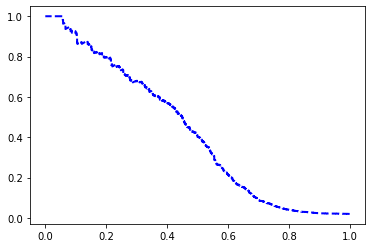

In [127]:
keyd="abs_logfc_x_jsd_x_max_percentile.mean"
#keyd="Beta"
fpr_chrombpnet, tpr_chrombpnet, _ = precision_recall_curve(alldf["label"].astype(int), abs(alldf[keyd]))
roc_auc = metrics.average_precision_score(alldf["label"], abs(alldf[keyd]))
plt.plot(tpr_chrombpnet,fpr_chrombpnet,  linewidth=2, c='blue', linestyle='dashed', label="ChromBPnet w/ ATAC, AP="+str(round(roc_auc,2)))
print(roc_auc)